In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import figformat as ff
import mfunc as mf
import shape
import math
import os

A4 = ff.get_A4size()
PROFILE_DIR = '/Users/fukudasoujirou/Documents/Hull_Uni/Data/Meanders/NormalisedCentreline'
PROFILE_PROCESSED_DIR = '/Users/fukudasoujirou/Documents/Hull_Uni/Data/Meanders/Preprocessed'
files = ff.listdir_nohidden(PROFILE_DIR)
files_pro = ff.listdir_nohidden(PROFILE_PROCESSED_DIR)
CENTRE_PATH_LIST = [PROFILE_DIR+os.sep+file for file in files ]
CENTRE_PROCESSED_PATH_LIST = [PROFILE_PROCESSED_DIR+os.sep+file for file in files_pro ]
print('Total:',len(CENTRE_PATH_LIST))
print('Total:',len(CENTRE_PROCESSED_PATH_LIST))

/Users/fukudasoujirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/fukudasoujirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.flo

Total: 132
Total: 132


/Users/fukudasoujirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/randomized_l1.py:152: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  precompute=False, eps=np.finfo(np.float).eps,
/Users/fukudasoujirou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/randomized_l1.py:320: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

In [4]:
import re
meanders_ori = []
meanders_pro = []
format_csv = '.csv'
format_txt = '.txt'
for i,path in enumerate(ff.log_progress(CENTRE_PATH_LIST)):
    md = shape.meander() # md object
    centre = pd.read_csv(path) # read csv
    md.x = centre['X [-]']
    md.y = centre['Y [-]']
    # get id
    digit_ind = re.search(r"\d", path.split(os.sep)[-1])
    if digit_ind:
        md.id = path.split(os.sep)[-1][:-len(format_csv)]      # site**
        md.site = path.split(os.sep)[-1][:digit_ind.start()]   # site
    else:
        md.id = path.split(os.sep)[-1][:-len(format_csv)]
        md.site = path.split(os.sep)[-1][:-len(format_csv)]
    meanders_ori.append(md)

for i,path in enumerate(ff.log_progress(CENTRE_PROCESSED_PATH_LIST)):
    md = shape.meander() # md object
    centre = pd.read_table(path,sep='\t',header=None) # read csv
    md.x = centre[0]
    md.y = centre[1]
    md.s = centre[2]
    md.c = centre[3]
    # get id
    digit_ind = re.search(r"\d", path.split(os.sep)[-1])
    if digit_ind:
        md.id = path.split(os.sep)[-1].split('_')[-1][:-len(format_txt)]      # site**
        md.site = path.split(os.sep)[-1][2:digit_ind.start()]   # site
    else:
        md.id = path.split(os.sep)[-1].split('_')[-1][:-len(format_txt)]
        md.site = path.split(os.sep)[-1].split('_')[-1][:-len(format_txt)]
    meanders_pro.append(md)

In [5]:
EXPORT_DIR = 'Export'
os.makedirs(EXPORT_DIR+os.sep+'Figure',exist_ok=True)
os.makedirs(EXPORT_DIR+os.sep+'Figure'+os.sep+'XYST',exist_ok=True)
for md in ff.log_progress(meanders_pro):
    # plot
    fig = plt.figure(figsize=(A4['width'], A4['half']*2))
    ax = plt.subplot2grid((2,1), (0,0),rowspan=1,colspan=1,fig = fig)
    bx = plt.subplot2grid((2,1), (1,0),rowspan=1,colspan=1,fig = fig)
    
    ax.plot(md.x,md.y,linewidth=2,alpha=0.5,label=md.id) # original
    ax.scatter([md.x[0]],[md.y[0]])
    ax.set_xlabel('X'); ax.set_ylabel('Y')
    # plot
    bx.plot(md.s,md.c,linewidth=2,alpha=0.5) # rotated
    bx.scatter([md.s[0]],[md.c[0]])
    bx.set_xlabel('s'); bx.set_ylabel('c')

    ax.grid(); bx.grid(); 
    ax.set_title(md.id); 
    plt.tight_layout()
    plt.savefig(EXPORT_DIR+os.sep+'Figure'+os.sep+'XYST'+os.sep+str(md.id)+'.pdf',dpi=300)
    plt.close()

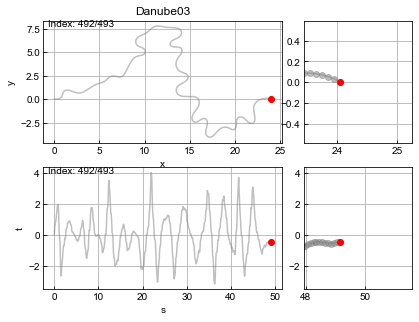

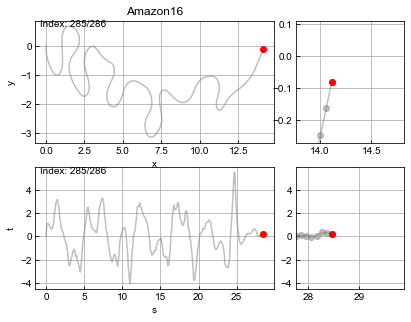

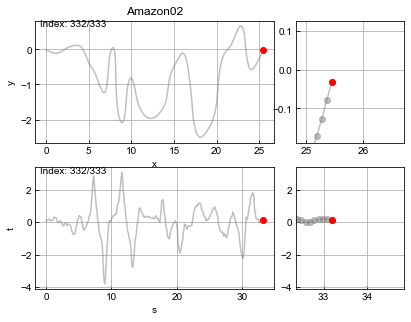

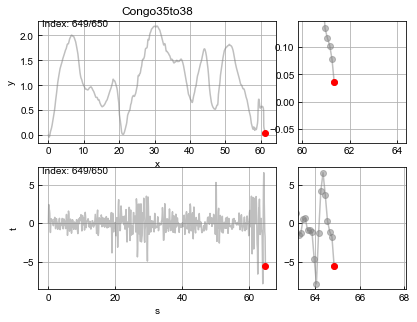

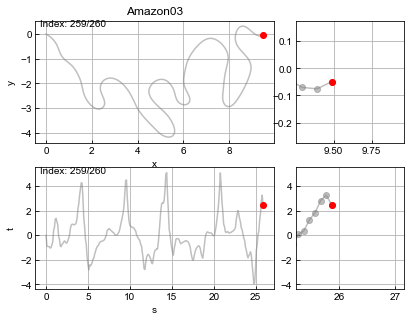

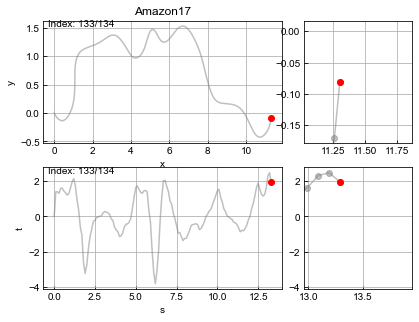

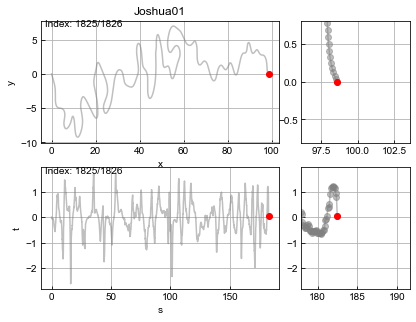

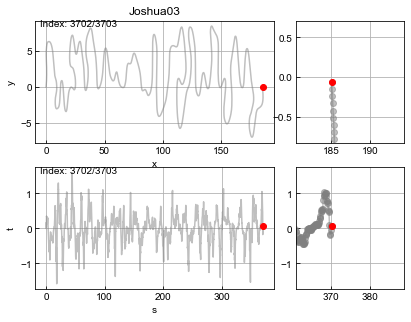

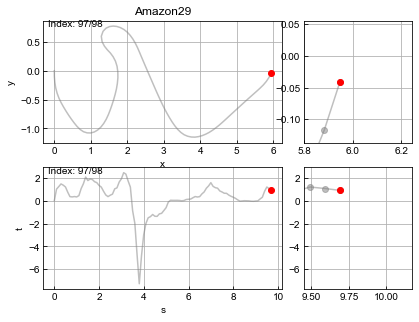

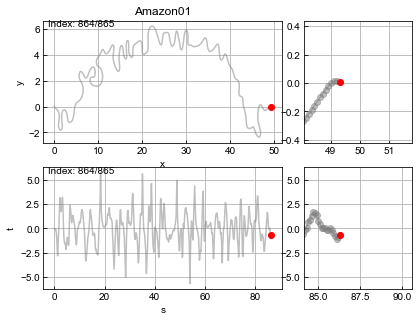

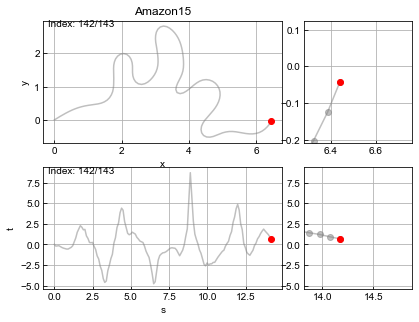

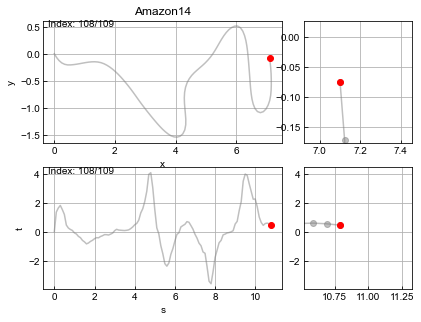

KeyboardInterrupt: 

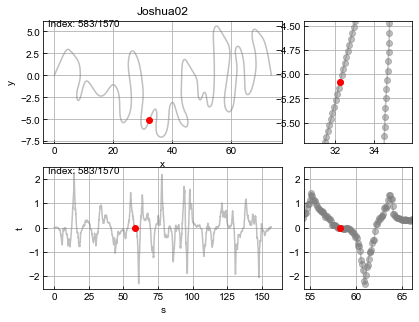

In [9]:
from matplotlib import animation
os.makedirs(EXPORT_DIR+os.sep+'Figure'+os.sep+'AnimXYSC',exist_ok=True)
for md in ff.log_progress(meanders_pro):
    
    window_length_x = (np.max(md.x) - np.min(md.x))/20
    window_length_y = (np.max(md.y) - np.min(md.y))/20
    window_length_s = (np.max(md.s) - np.min(md.s))/20
    limratio = 0.95
    
    fig = plt.figure(figsize=(A4['width'], A4['twothird']))
    ax = plt.subplot2grid((2,3), (0,0), rowspan=1, colspan=2, fig = fig)
    bx = plt.subplot2grid((2,3), (1,0), rowspan=1, colspan=2, fig = fig)
    cx = plt.subplot2grid((2,3), (0,2), rowspan=1, colspan=1, fig = fig)
    dx = plt.subplot2grid((2,3), (1,2), rowspan=1, colspan=1, fig = fig)
    
    ax.set_xlim(np.min(md.x) - (np.max(md.x) - np.min(md.x))*(1-limratio), np.max(md.x) + (np.max(md.x) - np.min(md.x))*(1-limratio))
    ax.set_ylim(np.min(md.y) - (np.max(md.y) - np.min(md.y))*(1-limratio), np.max(md.y) + (np.max(md.y) - np.min(md.y))*(1-limratio))
    bx.set_xlim(np.min(md.s) - (np.max(md.s) - np.min(md.s))*(1-limratio), np.max(md.s) + (np.max(md.s) - np.min(md.s))*(1-limratio) )
    bx.set_ylim(np.min(md.c) - (np.max(md.c) - np.min(md.c))*(1-limratio), np.max(md.c) + (np.max(md.c) - np.min(md.c))*(1-limratio) )
    cx.set_ylim(np.min(md.y) - (np.max(md.y) - np.min(md.y))*(1-limratio), np.max(md.y) + (np.max(md.y) - np.min(md.y))*(1-limratio))
    dx.set_ylim(np.min(md.c) - (np.max(md.c) - np.min(md.c))*(1-limratio), np.max(md.c) + (np.max(md.c) - np.min(md.c))*(1-limratio) )
    ax.set_title(md.id)
    ax.set_xlabel('x'); ax.set_ylabel('y')
    bx.set_xlabel('s'); bx.set_ylabel('t')
    ax.grid()
    bx.grid()
    cx.grid()
    dx.grid()
    
    centre, = ax.plot([],[],color='gray',alpha=0.5)
    stream, = bx.plot([],[],color='gray',alpha=0.5)
    pointc, = ax.plot([],[],'o',color='red')
    points, = bx.plot([],[],'o',color='red')
    time_text_a = ax.text(0.02, 0.95, '', transform=ax.transAxes)
    time_text_b = bx.text(0.02, 0.95, '', transform=bx.transAxes)
    
    centre_m, = cx.plot([],[],'-o',color='gray',alpha=0.5)
    stream_m, = dx.plot([],[],'-o',color='gray',alpha=0.5)
    pointc_m, = cx.plot([],[],'o',color='red')
    points_m, = dx.plot([],[],'o',color='red')
    # initialization function: plot the background of each frame
    def init():
        centre.set_data(md.x, md.y)
        stream.set_data(md.s,md.c)
        pointc.set_data([md.x[0]],[md.y[0]])
        points.set_data([md.s[0]],[md.c[0]])
        centre_m.set_data(md.x, md.y)
        stream_m.set_data(md.s,md.c)
        pointc_m.set_data([md.x[0]],[md.y[0]])
        points_m.set_data([md.s[0]],[md.c[0]])
        time_text_a.set_text('')
        time_text_b.set_text('')
        return centre, stream, pointc, points, centre_m, stream_m, pointc_m, points_m, time_text_a, time_text_b
    
    # animation function.  This is called sequentially
    def animate(i):
        centre.set_data(md.x, md.y)
        stream.set_data(md.s,md.c)
        pointc.set_data([md.x[i]],[md.y[i]])
        points.set_data([md.s[i]],[md.c[i]])
        
        centre_m.set_data(md.x, md.y)
        stream_m.set_data(md.s,md.c)
        pointc_m.set_data([md.x[i]],[md.y[i]])
        points_m.set_data([md.s[i]],[md.c[i]])
        cx.set_xlim(md.x[i] - (window_length_x/2), md.x[i] + window_length_x)
        cx.set_ylim(md.y[i] - window_length_y, md.y[i] + window_length_y)
        dx.set_xlim(md.s[i] - (window_length_s/2), md.s[i] + window_length_s)
#         dx.set_ylim(t[i] - window_length_x, md.x[i] + window_length_x)
        time_text_a.set_text('Index: '+str(i)+'/'+str(len(md.x)))
        time_text_b.set_text('Index: '+str(i)+'/'+str(len(md.x)))
        
        return centre, stream, pointc, points, centre_m, stream_m, pointc_m, points_m, time_text_a, time_text_b

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=int(len(md.x)), interval=40, blit=True)
    anim.save(EXPORT_DIR+os.sep+'Figure'+os.sep+'AnimXYSC'+os.sep+str(md.id)+'.mp4', fps=5)
    plt.show()
    plt.close()